# Libraries

In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from math import exp, sqrt, log
from scipy.linalg import expm
import itertools
import time

In [ ]:
from scipy.integrate import solve_ivp
from IPython.display import clear_output

In [ ]:
from Diff import *

In [ ]:
!git clone https://github.com/equadratures/equadratures
clear_output()

In [ ]:
new_code = '''
def hyperbolic_cross(orders):
    dimensions = len(orders)
    n = orders[0]
    I = np.arange(n+1)
    I = np.reshape(I, (1,-1))
    for k in range(2, dimensions+1):
        J = np.array([]).reshape((I.shape[0]+1, 0))
        for i in range(n+1):
            l = I.shape[1]
            for j in range(l):
                z = I[:,j]
                #z = np.reshape(z, (I.shape[0], 1))
                if (i+1)*np.prod(z+1) <= n+1:
                    z = np.row_stack((z.reshape((-1,1)), np.array([i]).reshape(1,1)))
                    J = np.hstack((J, z))
        I = J
    return I.T
'''

In [ ]:
with open("/content/equadratures/equadratures/basis.py", "a") as file:
  file.write(new_code)

In [ ]:
new_line_1 = '''        elif name == "hyperbolic-cross":
            basis = hyperbolic_cross(self.orders)
'''

# Open the file in read mode to read its contents
with open("/content/equadratures/equadratures/basis.py", 'r') as file:
    lines = file.readlines()

lines.insert(179, new_line_1)

# Open the file in write mode to overwrite its contents
with open("/content/equadratures/equadratures/basis.py", 'w') as file:
    file.writelines(lines)

new_line_2 = '''        elif name.lower() == "hyperbolic-cross":
            basis = hyperbolic_cross(self.orders)
'''

# Open the file in read mode to read its contents
with open("/content/equadratures/equadratures/basis.py", 'r') as file:
    lines = file.readlines()

lines.insert(93, new_line_2)

# Open the file in write mode to overwrite its contents
with open("/content/equadratures/equadratures/basis.py", 'w') as file:
    file.writelines(lines)

In [ ]:
with open("/content/equadratures/equadratures/optimisation.py", "r") as file:
    fix_1 = file.read()

# Lines to modify in equadratures/optimisation.py

fix_1 = fix_1.replace('objective = lambda x: k*np.asscalar(f(x))', 'objective = lambda x: k*f(x).item()')
fix_1 = fix_1.replace('constraint = lambda x: np.asscalar(g(x))', 'constraint = lambda x: g(x).item()')
fix_1 = fix_1.replace('self.f_old = np.asscalar(self.f[ind_min])', 'self.f_old = self.f[ind_min].item()')
fix_1 = fix_1.replace('return np.asscalar(f)', 'return f.item()')
fix_1 = fix_1.replace('np.asscalar(my_poly.get_polyfit(x))', 'my_poly.get_polyfit(x).item()')
fix_1 = fix_1.replace('np.asscalar(my_poly.get_polyfit(np.dot(x,self.U)))', 'my_poly.get_polyfit(np.dot(x,self.U)).item()')
fix_1 = fix_1.replace('del_m = np.asscalar(my_poly.get_polyfit(self.s_old)) - m_new', 'del_m = np.ndarray.item(my_poly.get_polyfit(self.s_old)) - m_new')
fix_1 = fix_1.replace('del_m = np.asscalar(my_poly.get_polyfit(np.dot(self.s_old,self.U))) - m_new', 'del_m = np.ndarray.item(my_poly.get_polyfit(np.dot(self.s_old,self.U))) - m_new')

with open("/content/equadratures/equadratures/optimisation.py", "w") as file:
    file.write(fix_1)

In [ ]:
with open("/content/equadratures/equadratures/sampling_methods/induced.py", "r") as file:
    fix_2 = file.read()

# Lines to modify in equadratures/sampling_methods/induced.py

fix_2 = fix_2.replace('F = np.asscalar(F)', 'F = F.item()')

with open("/content/equadratures/equadratures/sampling_methods/induced.py", "w") as file:
    file.write(fix_2)

In [ ]:
with open("/content/equadratures/equadratures/solver.py", "r") as file:
    fix_3 = file.read()

# Lines to modify in equadratures/solver.py

fix_3 = fix_3.replace('fe = 0.5*(np.asscalar(np.dot(r.T,r)) - epsilon**2)', 'fe = 0.5*(np.dot(r.T,r).item() - epsilon**2)')
fix_3 = fix_3.replace('cqe = np.asscalar(np.dot(r.T,r)) - epsilon**2', 'cqe = np.dot(r.T,r).item() - epsilon**2')

with open("/content/equadratures/equadratures/solver.py", "w") as file:
    file.write(fix_3)

In [ ]:
with open("/content/equadratures/equadratures/subspaces.py", "r") as file:
    fix_4 = file.read()

# Lines to modify in equadratures/subspaces.py

fix_4 = fix_4.replace('dV[:,l,:,j] = np.asscalar(vectord[l])*(X.T*current[:,j])', 'dV[:,l,:,j] = vectord[l].item()*(X.T*current[:,j])')

with open("/content/equadratures/equadratures/subspaces.py", "w") as file:
    file.write(fix_4)

In [ ]:
import sys
sys.path.append('/content/equadratures')

import equadratures as eq

In [ ]:
import matplotlib.lines as mlines

# MOSEK installation

In [ ]:
!pip install mosek
clear_output()

In [ ]:
import os

root_dir = '/root/'
folder_name = 'mosek'

folder_path = os.path.join(root_dir, folder_name)

if not os.path.exists(folder_path):
    os.makedirs(folder_path)
    print(f"Folder '{folder_name}' created in '{root_dir}'.")
else:
    print(f"Folder '{folder_name}' already exists in '{root_dir}'.")

Folder 'mosek' created in '/root/'.


In [ ]:
from google.colab import drive
import shutil

drive.mount('/content/drive')

root_dir = '/root/'
folder_name = 'mosek'

file_path_in_drive = '/content/drive/MyDrive/mosek.lic'

destination_path = os.path.join(root_dir, folder_name, os.path.basename(file_path_in_drive))

# Copy the file from Google Drive to Colab
shutil.copyfile(file_path_in_drive, destination_path)
print(f"File '{os.path.basename(file_path_in_drive)}' successfully copied to '{destination_path}'.")

# Unmount Google Drive
#drive.flush_and_unmount()
#print('Google Drive unmounted.')


Mounted at /content/drive
File 'mosek.lic' successfully copied to '/root/mosek/mosek.lic'.


In [ ]:
#!pip install cvxpy[MOSEK]
#import mosek
import cvxpy as cp

In [ ]:
from cvxpy.reductions.solvers import defines as slv_def
slv_def.INSTALLED_SOLVERS.append('MOSEK')

# Graph initialization

In [ ]:
def initialize_graph(K, n_K, prob=0.04, activ_ratio=0.2):
  ### Inputs: # of communities K, # of nodes per community, probs of connections..?, ratio of active nodes for x0
  ### Outputs: graph G, # of nodes, adjacency matrix A and Laplacian L, vector of community sizes, initial conditions x0

  sizes = [n_K for _ in range(K)]
  probs = prob * np.ones((K,K)) + (1-prob) * np.identity(K)
  probs = probs.tolist()

  G = nx.stochastic_block_model(sizes, probs, seed=0)
  A = nx.adjacency_matrix(G).todense()
  L = nx.laplacian_matrix(G).toarray()

  n = G.number_of_nodes()
  x0 = np.zeros(n)
  activ = np.random.choice(n, int(activ_ratio*n))
  x0[activ] = 100

  return G, n, A, L, sizes, x0


In [ ]:
#initialize_graph(2, 5, 0.04)

# Custom functions

In [ ]:
def ed_diff_function(y):
  y = (y+1)/2
  c_bar = construct_cbar(y)

  C = construct_C(c_bar, sizes, n)
  D = construct_D(A, C, n)
  M = C*A - D

  diff = ed_diffusion(M, x0, tau=0.01, T=1)

  return diff[2,-1]

In [ ]:
def ted_diff_function(y):
  y = (y+1)/2
  c_bar = construct_cbar(y)

  C = construct_C(c_bar, sizes, n)
  M_t = construct_Mt(A, C, sizes, alpha=[2,3,4])

  diff = RK4_t(x0, 0.01, M_t, A, sizes)

  return diff[2,-1]

In [ ]:
# Custom solvers

solver = cp.MOSEK

def qcbp(A, b, eta=1e-6, **kwargs):
  n = A.shape[1]
  z = cp.Variable(n)
  b = np.reshape(b, (b.shape[0],))  # to avoid shape issues when defining the constraint
  objective = cp.Minimize(cp.norm1(z))
  constraints = [cp.norm2(A@z-b) <= eta]
  prob = cp.Problem(objective, constraints)
  result = prob.solve(solver=solver)

  return z.value #.reshape((n,1))


def weighted_qcbp(A, b, eta=10e-5, w=np.array([]), **kwargs):
  n = A.shape[1]
  z = cp.Variable(n)
  b = np.reshape(b, (b.shape[0],))  # to avoid shape issues when defining the constraint
  objective = cp.Minimize(w.T@cp.abs(z))
  constraints = [cp.norm2(A@z-b) <= eta]
  prob = cp.Problem(objective, constraints)
  result = prob.solve(solver=solver)

  return z.value #.reshape((n,1))


def ls(A, b, **kwargs):
  n = A.shape[1]
  z = cp.Variable(n)
  b = np.reshape(b, (b.shape[0],))  # to avoid shape issues when defining the constraint
  objective = cp.Minimize(cp.norm2(A@z-b))
  prob = cp.Problem(objective)
  result = prob.solve(solver=solver)

  return z.value #.reshape((n,1))

In [ ]:
def get_average_rmse(m, my_method, dim=3, simuls=5, basis='total-order', ord=4):
  errors = np.array([])
  my_param_list = [eq.Parameter(distribution='uniform', order=ord, lower=-1.0, upper=1.0) for i in range(dim)]

  #if basis == 'hyperbolic-cross':
  my_basis = eq.Basis(basis, orders=[ord for _ in range(dim)])
  #else:
  #  my_basis = eq.Basis(basis)


  if my_method == qcbp or my_method == weighted_qcbp:
    poly = eq.Poly([eq.Parameter(distribution='uniform', order=ord, lower=-1.0, upper=1.0) for _ in range(dim)], my_basis)
    index_set_size = my_basis.get_cardinality()
    M = 10 * index_set_size
    err_grid = np.random.uniform(-1, 1, size=(M, dim))
    A_err_grid = poly.get_poly(err_grid).T/sqrt(M)
    b_err_grid = eq.evaluate_model(err_grid, ed_diff_function)/sqrt(M)
    c_ref, _, _, _ = np.linalg.lstsq(A_err_grid, b_err_grid)

  for j in range(simuls):

    start = time.time()

    X_train = np.random.uniform(-1, 1, size=(m, dim))
    y_train = eq.evaluate_model(X_train, ed_diff_function)

    end = time.time()
    elapsed = end - start
    print('Training data generated in {} seconds.'.format(elapsed))

    start = time.time()

    if my_method == qcbp:
      # oracle parameter
      my_poly_ref = eq.Poly(my_param_list, my_basis, method='least-squares',
            sampling_args={'mesh':'user-defined', 'sample-points':X_train, 'sample-outputs':y_train})
      A = my_poly_ref.get_poly(X_train).T
      eta_opt = np.linalg.norm(A@c_ref - y_train)
      # define poly
      my_poly = eq.Poly(my_param_list, my_basis, method='custom-solver',
          sampling_args={'mesh':'user-defined', 'sample-points':X_train, 'sample-outputs':y_train},
            solver_args={'solve':my_method, 'eta':eta_opt, 'verbose':False})
    elif my_method == weighted_qcbp:
      # oracle parameter
      my_poly_ref = eq.Poly(my_param_list, my_basis, method='least-squares',
            sampling_args={'mesh':'user-defined', 'sample-points':X_train, 'sample-outputs':y_train})
      A = my_poly_ref.get_poly(X_train).T
      eta_opt = np.linalg.norm(A@c_ref - y_train)
      # weights computation
      I = my_basis.get_elements().T
      size_I = I.shape
      weights = np.prod(np.sqrt(2 * I + np.ones(size_I)), axis=0)
      # define poly
      my_poly = eq.Poly(my_param_list, my_basis, method='custom-solver',
          sampling_args={'mesh':'user-defined', 'sample-points':X_train, 'sample-outputs':y_train},
            solver_args={'solve':my_method, 'eta':eta_opt, 'w':weights, 'verbose':False})
    elif my_method == ls:
      my_poly = eq.Poly(my_param_list, my_basis, method='custom-solver',
          sampling_args={'mesh':'user-defined', 'sample-points':X_train, 'sample-outputs':y_train},
            solver_args={'solve':my_method, 'verbose':False})

    my_poly.set_model()

    end = time.time()
    elapsed_1 = end - start
    print('Coefficients obtained in {} seconds'.format(elapsed_1))
    start_2 = time.time()


    test_pts = np.random.uniform(-1, 1, size=(1000, dim))
    test_evals = eq.evaluate_model(test_pts, ed_diff_function)
    train_r2, test_r2 = my_poly.get_polyscore(X_test=test_pts, y_test=test_evals, metric='rmse')
    train_r2, test_r2

    end_2 = time.time()
    elapsed_2 = end_2 - start_2
    print('RMSE computed in {} seconds. Round {} completed.'.format(elapsed_2, str(j)))


    errors = np.append(errors, test_r2)

  #return np.mean(errors)
  return errors

In [ ]:
def get_average_rmse_ted(m, my_method, dim=3, simuls=5, basis='total-order', ord=4):
  errors = np.array([])
  my_param_list = [eq.Parameter(distribution='uniform', order=ord, lower=-1.0, upper=1.0) for i in range(dim)]

  my_basis = eq.Basis(basis, orders=[ord for _ in range(dim)])

  if my_method == qcbp or my_method == weighted_qcbp:
    poly = eq.Poly([eq.Parameter(distribution='uniform', order=ord, lower=-1.0, upper=1.0) for _ in range(dim)], my_basis)
    index_set_size = my_basis.get_cardinality()
    M = 10 * index_set_size
    err_grid = np.random.uniform(-1, 1, size=(M, dim))
    A_err_grid = poly.get_poly(err_grid).T/sqrt(M)
    b_err_grid = eq.evaluate_model(err_grid, ted_diff_function)/sqrt(M)
    c_ref, _, _, _ = np.linalg.lstsq(A_err_grid, b_err_grid)

  for j in range(simuls):
    start = time.time()

    X_train = np.random.uniform(-1, 1, size=(m, dim))
    y_train = eq.evaluate_model(X_train, ted_diff_function)

    if my_method == qcbp:
      # oracle parameter
      my_poly_ref = eq.Poly(my_param_list, my_basis, method='least-squares',
            sampling_args={'mesh':'user-defined', 'sample-points':X_train, 'sample-outputs':y_train})
      A = my_poly_ref.get_poly(X_train).T
      eta_opt = np.linalg.norm(A@c_ref - y_train)
      # define poly
      my_poly = eq.Poly(my_param_list, my_basis, method='custom-solver',
          sampling_args={'mesh':'user-defined', 'sample-points':X_train, 'sample-outputs':y_train},
            solver_args={'solve':my_method, 'eta':eta_opt, 'verbose':False})
    elif my_method == weighted_qcbp:
      # oracle parameter
      my_poly_ref = eq.Poly(my_param_list, my_basis, method='least-squares',
            sampling_args={'mesh':'user-defined', 'sample-points':X_train, 'sample-outputs':y_train})
      A = my_poly_ref.get_poly(X_train).T
      eta_opt = np.linalg.norm(A@c_ref - y_train)
      # weights computation
      I = my_basis.get_elements().T
      size_I = I.shape
      weights = np.prod(np.sqrt(2 * I + np.ones(size_I)), axis=0)
      # define poly
      my_poly = eq.Poly(my_param_list, my_basis, method='custom-solver',
          sampling_args={'mesh':'user-defined', 'sample-points':X_train, 'sample-outputs':y_train},
            solver_args={'solve':my_method, 'eta':eta_opt, 'w':weights, 'verbose':False})
    elif my_method == ls:
      my_poly = eq.Poly(my_param_list, my_basis, method='custom-solver',
          sampling_args={'mesh':'user-defined', 'sample-points':X_train, 'sample-outputs':y_train},
            solver_args={'solve':my_method, 'verbose':False})

    my_poly.set_model()

    test_pts = np.random.uniform(-1, 1, size=(1000, dim))
    test_evals = eq.evaluate_model(test_pts, ted_diff_function)
    train_r2, test_r2 = my_poly.get_polyscore(X_test=test_pts, y_test=test_evals, metric='rmse')
    train_r2, test_r2

    errors = np.append(errors, test_r2)

    end = time.time()
    elapsed_time = end - start
    print('Round {} completed in {} seconds.'.format(str(j), elapsed_time))

  #return np.mean(errors)
  return errors

In [ ]:
def conv(x, method, dim=3, simuls=5, basis='total-order', ord=4, verbose=False):
  Y = []

  for element in x:
    if verbose:
      start = time.time()
    Y.append(get_average_rmse(element, method, dim=dim, simuls=simuls, ord=ord, basis=basis))
    if verbose:
      end = time.time()
      print('m={} w/ {}, done: {} seconds.'.format(element, method, end-start))

  return np.array(Y)

In [ ]:
def conv_ted(x, method, dim=3, simuls=5, basis='total-order', ord=4, verbose=False):
  Y = []

  for element in x:
    if verbose:
      start = time.time()
    Y.append(get_average_rmse_ted(element, method, dim=dim, simuls=simuls, ord=ord, basis=basis))
    if verbose:
      end = time.time()
      print('m={} w/ {}, done: {} seconds.'.format(element, method, end-start))

  return np.array(Y)

In [ ]:
def get_mu(y, N_trial):
  return 1/N_trial * np.sum(np.log10(y), axis=1)

def get_sig(y, mu, N_trial):
  return np.sqrt(1/(N_trial - 1) * np.sum((np.log10(y) - np.repeat(mu.reshape(mu.shape[0],1), y.shape[1], axis=1))**2, axis=1))

# Polynomial approximation

## Average RMSE vs. number of samples

In [ ]:
folder_experiments = '/content/drive/My Drive/graph_surrogate_data/'

### d = 3

In [ ]:
eq.basis.Basis('total-order', orders=[8 for _ in range(3)]).get_cardinality()

165

In [ ]:
eq.basis.Basis('hyperbolic-cross', orders=[30 for _ in range(3)]).get_cardinality()

279

In [ ]:
### Impact of nodes on accuracy

d = 3  # dimension
K = 2  # communities
node_count = [3**k for k in range(1,6)]
err = []

for N in node_count:
  G, n, A, L, sizes, x0 = initialize_graph(K, N)
  start = time.time()
  err.append(get_average_rmse(200, ls, dim=d, simuls=1, basis='total-order', ord=8))
  end = time.time()
  elapsed_time = end - start
  print('Communities w/ {} nodes completed in {} seconds.'.format(N, elapsed_time))

Communities w/ 3 nodes completed in 3.467101812362671 seconds.
Communities w/ 9 nodes completed in 8.989426136016846 seconds.
Communities w/ 27 nodes completed in 47.63040375709534 seconds.
Communities w/ 81 nodes completed in 930.6355836391449 seconds.


KeyboardInterrupt: 

In [ ]:
G, n, A, L, sizes, x0 = initialize_graph(K, 243)
start = time.time()
err.append(get_average_rmse(200, ls, dim=d, simuls=1, basis='total-order', ord=8))
end = time.time()
elapsed_time = end - start
print('Communities w/ {} nodes completed in {} seconds.'.format(N, elapsed_time))

Communities w/ 243 nodes completed in 20158.654712438583 seconds.


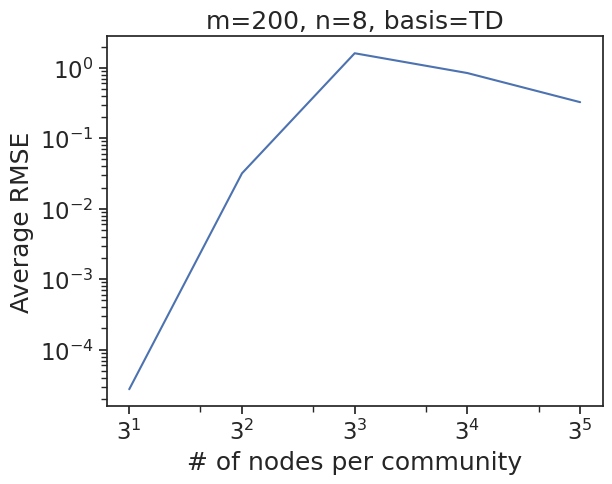

In [ ]:
plt.plot(node_count, err)
plt.xlabel('# of nodes per community')
plt.ylabel('Average RMSE')
plt.xscale('log', base=3)
plt.yscale('log')
plt.title('m=200, n=8, basis=TD')
plt.show()

In [ ]:
### Save data for average RMSE vs. nb of samples, w/ TD index set

d = 3  # dimension
K = 2  # communities

G, n, A, L, sizes, x0 = initialize_graph(K, 5)
basis = 'total-order'
name_basis = 'TD'
order = 8
cardinality = eq.basis.Basis(basis, orders=[order for _ in range(d)]).get_cardinality()  # 165
start, end, step = 25, 325, 25
nb_samples = [i for i in range(start, end, step)]
N_trial = 20


'''
y_ls = conv(nb_samples, ls, dim=d, simuls=N_trial, basis=basis, ord=order)
np.savetxt(folder_experiments + 'ED_d{}n{}{}_{}-{}-{}_LS_k5.txt'.format(d, order, name_basis, start, end, step), y_ls, fmt='%.10e')
'''
y_cs = conv(nb_samples, qcbp, dim=d, simuls=N_trial, basis=basis, ord=order)
np.savetxt(folder_experiments + 'ED_d{}n{}{}_{}-{}-{}_QCBP_k5.txt'.format(d, order, name_basis, start, end, step), y_cs, fmt='%.10e')
y_wcs = conv(nb_samples, weighted_qcbp, dim=d, simuls=N_trial, basis=basis, ord=order)
np.savetxt(folder_experiments + 'ED_d{}n{}{}_{}-{}-{}_wQCBP_k5.txt'.format(d, order, name_basis, start, end, step), y_wcs, fmt='%.10e')
clear_output()

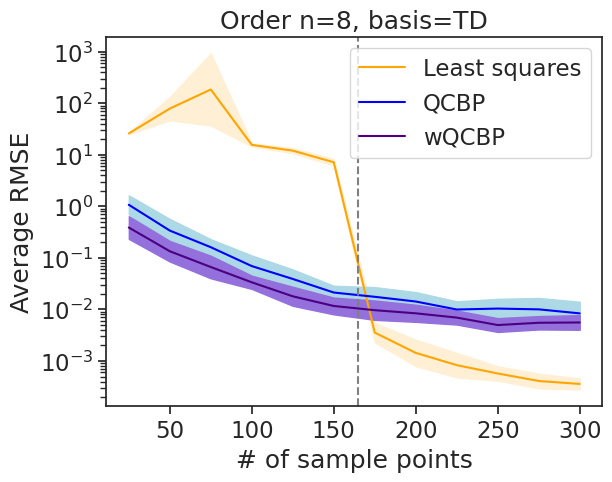

In [ ]:
### Convergence plot of average RMSE vs. nb of samples, w/ TD index set

d = 3  # dimension

basis = 'total-order'
name_basis = 'TD'
order = 8
cardinality = eq.basis.Basis(basis, orders=[order for _ in range(d)]).get_cardinality()  # 165
start, end, step = 25, 325, 25
nb_samples = [i for i in range(start, end, step)]

y_ls = np.loadtxt(folder_experiments + 'ED_d{}n{}{}_{}-{}-{}_LS_k5.txt'.format(d, order, name_basis, start, end, step))
y_cs = np.loadtxt(folder_experiments + 'ED_d{}n{}{}_{}-{}-{}_QCBP_k5.txt'.format(d, order, name_basis, start, end, step))
y_wcs = np.loadtxt(folder_experiments + 'ED_d{}n{}{}_{}-{}-{}_wQCBP_k5.txt'.format(d, order, name_basis, start, end, step))

N_ls = y_ls.shape[1]
N_cs = y_ls.shape[1]
N_wcs = y_ls.shape[1]

mu_ls = get_mu(y_ls, N_ls)
sig_ls = get_sig(y_ls, mu_ls, N_ls)

mu_cs = get_mu(y_cs, N_cs)
sig_cs = get_sig(y_cs, mu_cs, N_cs)

mu_wcs = get_mu(y_wcs, N_wcs)
sig_wcs = get_sig(y_wcs, mu_wcs, N_wcs)


fig, ax = plt.subplots()
ax.plot(nb_samples, 10**mu_ls, 'orange', label='Least squares')
ax.plot(nb_samples, 10**mu_cs, 'blue', label='QCBP')
ax.plot(nb_samples, 10**mu_wcs, 'indigo', label='wQCBP')
ax.fill_between(nb_samples, 10**(mu_ls - sig_ls), 10**(mu_ls + sig_ls), color='papayawhip')
ax.fill_between(nb_samples, 10**(mu_cs - sig_cs), 10**(mu_cs + sig_cs), color='lightblue')
ax.fill_between(nb_samples, 10**(mu_wcs - sig_wcs), 10**(mu_wcs + sig_wcs), color='mediumpurple')
ax.axvline(x=cardinality, color='grey', linestyle='--')
ax.set_yscale('log')
ax.set_xlabel('# of sample points')
ax.set_ylabel('Average RMSE')
ax.set_title('Order n={}, basis={}'.format(str(order), name_basis))
ax.legend()

In [ ]:
### Save data for average RMSE vs. nb of samples, w/ HC index set

d = 3  # dimension
K = 2  # communities

G, n, A, L, sizes, x0 = initialize_graph(K, 5)
basis = 'hyperbolic-cross'
name_basis = 'HC'
order = 20
# cardinality = eq.basis.Basis(basis, orders=[order for _ in range(d)]).get_cardinality()  # 161
start, end, step = 25, 325, 25
nb_samples = [i for i in range(start, end, step)]
N_trial = 20

'''
y_ls = conv(nb_samples, ls, dim=d, simuls=N_trial, basis=basis, ord=order)
np.savetxt(folder_experiments + 'ED_d{}n{}{}_{}-{}-{}_LS_k5.txt'.format(d, order, name_basis, start, end, step), y_ls, fmt='%.10e')
'''
y_cs = conv(nb_samples, qcbp, dim=d, simuls=N_trial, basis=basis, ord=order)
np.savetxt(folder_experiments + 'ED_d{}n{}{}_{}-{}-{}_QCBP_k5.txt'.format(d, order, name_basis, start, end, step), y_cs, fmt='%.10e')
y_wcs = conv(nb_samples, weighted_qcbp, dim=d, simuls=N_trial, basis=basis, ord=order)
np.savetxt(folder_experiments + 'ED_d{}n{}{}_{}-{}-{}_wQCBP_k5.txt'.format(d, order, name_basis, start, end, step), y_wcs, fmt='%.10e')
clear_output()

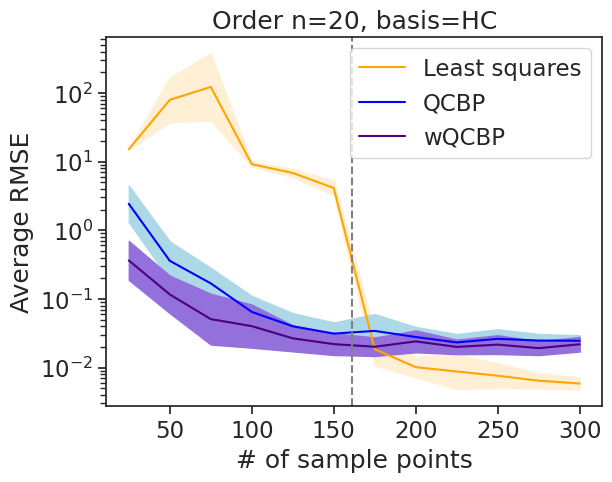

In [ ]:
### Convergence plot of average RMSE vs. nb of samples, w/ HC index set

d = 3  # dimension

basis = 'hyperbolic-cross'
name_basis = 'HC'
order = 20
cardinality = eq.basis.Basis(basis, orders=[order for _ in range(d)]).get_cardinality()  # 161
start, end, step = 25, 325, 25
nb_samples = [i for i in range(start, end, step)]

y_ls = np.loadtxt(folder_experiments + 'ED_d{}n{}{}_{}-{}-{}_LS_k5.txt'.format(d, order, name_basis, start, end, step))
y_cs = np.loadtxt(folder_experiments + 'ED_d{}n{}{}_{}-{}-{}_QCBP_k5.txt'.format(d, order, name_basis, start, end, step))
y_wcs = np.loadtxt(folder_experiments + 'ED_d{}n{}{}_{}-{}-{}_wQCBP_k5.txt'.format(d, order, name_basis, start, end, step))

N_ls = y_ls.shape[1]
N_cs = y_ls.shape[1]
N_wcs = y_ls.shape[1]

mu_ls = get_mu(y_ls, N_ls)
sig_ls = get_sig(y_ls, mu_ls, N_ls)

mu_cs = get_mu(y_cs, N_cs)
sig_cs = get_sig(y_cs, mu_cs, N_cs)

mu_wcs = get_mu(y_wcs, N_wcs)
sig_wcs = get_sig(y_wcs, mu_wcs, N_wcs)


fig, ax = plt.subplots()
ax.plot(nb_samples, 10**mu_ls, 'orange', label='Least squares')
ax.plot(nb_samples, 10**mu_cs, 'blue', label='QCBP')
ax.plot(nb_samples, 10**mu_wcs, 'indigo', label='wQCBP')
ax.fill_between(nb_samples, 10**(mu_ls - sig_ls), 10**(mu_ls + sig_ls), color='papayawhip')
ax.fill_between(nb_samples, 10**(mu_cs - sig_cs), 10**(mu_cs + sig_cs), color='lightblue')
ax.fill_between(nb_samples, 10**(mu_wcs - sig_wcs), 10**(mu_wcs + sig_wcs), color='mediumpurple')
ax.axvline(x=cardinality, color='grey', linestyle='--')
ax.set_yscale('log')
ax.set_xlabel('# of sample points')
ax.set_ylabel('Average RMSE')
ax.set_title('Order n={}, basis={}'.format(str(order), name_basis))
ax.legend()

In [ ]:
### Save data for average RMSE vs. nb of samples, w/ HC index set

d = 3  # dimension
K = 2  # communities

G, n, A, L, sizes, x0 = initialize_graph(K, 5)
basis = 'hyperbolic-cross'
name_basis = 'HC'
order = 30
cardinality = eq.basis.Basis(basis, orders=[order for _ in range(d)]).get_cardinality()  # 279
start, end, step = 50, 650, 50
nb_samples = [i for i in range(start, end, step)]
N_trial = 20

'''
y_ls = conv(nb_samples, ls, dim=d, simuls=N_trial, basis=basis, ord=order)
np.savetxt(folder_experiments + 'ED_d{}n{}{}_{}-{}-{}_LS_k5.txt'.format(d, order, name_basis, start, end, step), y_ls, fmt='%.10e')
'''
y_cs = conv(nb_samples, qcbp, dim=d, simuls=N_trial, basis=basis, ord=order)
np.savetxt(folder_experiments + 'ED_d{}n{}{}_{}-{}-{}_QCBP_k5.txt'.format(d, order, name_basis, start, end, step), y_cs, fmt='%.10e')
y_wcs = conv(nb_samples, weighted_qcbp, dim=d, simuls=N_trial, basis=basis, ord=order)
np.savetxt(folder_experiments + 'ED_d{}n{}{}_{}-{}-{}_wQCBP_k5.txt'.format(d, order, name_basis, start, end, step), y_wcs, fmt='%.10e')
clear_output()

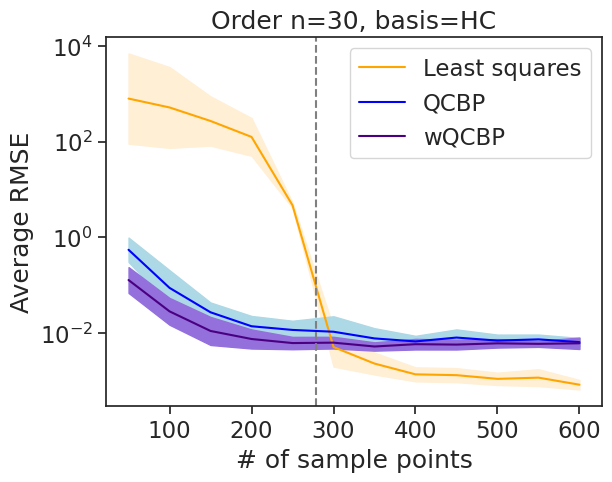

In [ ]:
### Convergence plot of average RMSE vs. nb of samples, w/ HC index set

d = 3  # dimension

basis = 'hyperbolic-cross'
name_basis = 'HC'
order = 30
cardinality = eq.basis.Basis(basis, orders=[order for _ in range(d)]).get_cardinality()  # 279
start, end, step = 50, 650, 50
nb_samples = [i for i in range(start, end, step)]

y_ls = np.loadtxt(folder_experiments + 'ED_d{}n{}{}_{}-{}-{}_LS_k5.txt'.format(d, order, name_basis, start, end, step))
y_cs = np.loadtxt(folder_experiments + 'ED_d{}n{}{}_{}-{}-{}_QCBP_k5.txt'.format(d, order, name_basis, start, end, step))
y_wcs = np.loadtxt(folder_experiments + 'ED_d{}n{}{}_{}-{}-{}_wQCBP_k5.txt'.format(d, order, name_basis, start, end, step))

N_ls = y_ls.shape[1]
N_cs = y_ls.shape[1]
N_wcs = y_ls.shape[1]

mu_ls = get_mu(y_ls, N_ls)
sig_ls = get_sig(y_ls, mu_ls, N_ls)

mu_cs = get_mu(y_cs, N_cs)
sig_cs = get_sig(y_cs, mu_cs, N_cs)

mu_wcs = get_mu(y_wcs, N_wcs)
sig_wcs = get_sig(y_wcs, mu_wcs, N_wcs)


fig, ax = plt.subplots()
ax.plot(nb_samples, 10**mu_ls, 'orange', label='Least squares')
ax.plot(nb_samples, 10**mu_cs, 'blue', label='QCBP')
ax.plot(nb_samples, 10**mu_wcs, 'indigo', label='wQCBP')
ax.fill_between(nb_samples, 10**(mu_ls - sig_ls), 10**(mu_ls + sig_ls), color='papayawhip')
ax.fill_between(nb_samples, 10**(mu_cs - sig_cs), 10**(mu_cs + sig_cs), color='lightblue')
ax.fill_between(nb_samples, 10**(mu_wcs - sig_wcs), 10**(mu_wcs + sig_wcs), color='mediumpurple')
ax.axvline(x=cardinality, color='grey', linestyle='--')
ax.set_yscale('log')
ax.set_xlabel('# of sample points')
ax.set_ylabel('Average RMSE')
ax.set_title('Order n={}, basis={}'.format(str(order), name_basis))
ax.legend()

In [ ]:
### Save data for average RMSE vs. nb of samples, w/ TD index set
### **TED diffusion**

d = 3  # dimension
K = 2  # communities

G, n, A, L, sizes, x0 = initialize_graph(K, 5)
basis = 'total-order'
name_basis = 'TD'
order = 8    # cardinality = 165
start, end, step = 25, 325, 25
nb_samples = [i for i in range(start, end, step)]
N_trial = 10

'''
y_ls = conv_ted(nb_samples, ls, dim=d, simuls=N_trial, basis=basis, ord=order)
np.savetxt(folder_experiments + 'TED_d{}n{}{}_{}-{}-{}_LS_k5.txt'.format(d, order, name_basis, start, end, step), y_ls, fmt='%.10e')
y_cs = conv_ted(nb_samples, qcbp, dim=d, simuls=N_trial, basis=basis, ord=order)
np.savetxt(folder_experiments + 'TED_d{}n{}{}_{}-{}-{}_QCBP_k5.txt'.format(d, order, name_basis, start, end, step), y_cs, fmt='%.10e')
'''
y_wcs = conv_ted(nb_samples, weighted_qcbp, dim=d, simuls=N_trial, basis=basis, ord=order)
np.savetxt(folder_experiments + 'TED_d{}n{}{}_{}-{}-{}_wQCBP_k5.txt'.format(d, order, name_basis, start, end, step), y_wcs, fmt='%.10e')
clear_output()

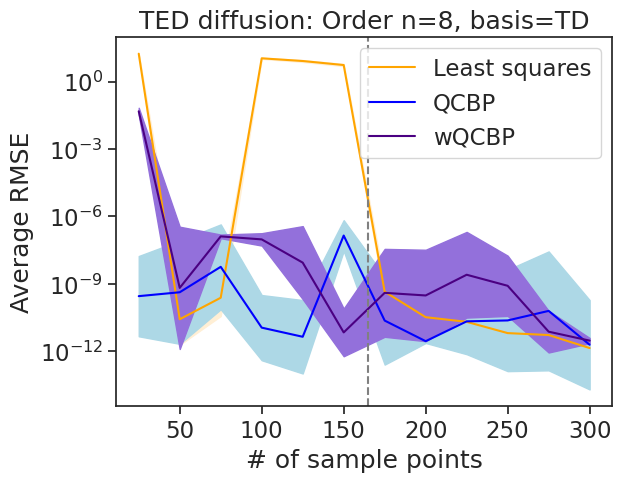

In [ ]:
### Convergence plot of average RMSE vs. nb of samples, w/ TD index set
### **TED diffusion**

d = 3  # dimension

basis = 'total-order'
name_basis = 'TD'
order = 8
cardinality = eq.basis.Basis(basis, orders=[order for _ in range(d)]).get_cardinality()  # 165
start, end, step = 25, 325, 25
nb_samples = [i for i in range(start, end, step)]

y_ls = np.loadtxt(folder_experiments + 'TED_d{}n{}{}_{}-{}-{}_LS_k5.txt'.format(d, order, name_basis, start, end, step))
y_cs = np.loadtxt(folder_experiments + 'TED_d{}n{}{}_{}-{}-{}_QCBP_k5.txt'.format(d, order, name_basis, start, end, step))
y_wcs = np.loadtxt(folder_experiments + 'TED_d{}n{}{}_{}-{}-{}_wQCBP_k5.txt'.format(d, order, name_basis, start, end, step))

N_ls = y_ls.shape[1]
N_cs = y_ls.shape[1]
N_wcs = y_ls.shape[1]

mu_ls = get_mu(y_ls, N_ls)
sig_ls = get_sig(y_ls, mu_ls, N_ls)

mu_cs = get_mu(y_cs, N_cs)
sig_cs = get_sig(y_cs, mu_cs, N_cs)

mu_wcs = get_mu(y_wcs, N_wcs)
sig_wcs = get_sig(y_wcs, mu_wcs, N_wcs)


fig, ax = plt.subplots()
ax.plot(nb_samples, 10**mu_ls, 'orange', label='Least squares')
ax.plot(nb_samples, 10**mu_cs, 'blue', label='QCBP')
ax.plot(nb_samples, 10**mu_wcs, 'indigo', label='wQCBP')
ax.fill_between(nb_samples, 10**(mu_ls - sig_ls), 10**(mu_ls + sig_ls), color='papayawhip')
ax.fill_between(nb_samples, 10**(mu_cs - sig_cs), 10**(mu_cs + sig_cs), color='lightblue')
ax.fill_between(nb_samples, 10**(mu_wcs - sig_wcs), 10**(mu_wcs + sig_wcs), color='mediumpurple')
ax.axvline(x=cardinality, color='grey', linestyle='--')
ax.set_yscale('log')
ax.set_xlabel('# of sample points')
ax.set_ylabel('Average RMSE')
ax.set_title('TED diffusion: Order n={}, basis={}'.format(str(order), name_basis))
ax.legend()

In [ ]:
### Save data for average RMSE vs. nb of samples, w/ TD index set
### **TED diffusion**

d = 3  # dimension
K = 2  # communities

G, n, A, L, sizes, x0 = initialize_graph(K, 5)
basis = 'hyperbolic-cross'
name_basis = 'HC'
order = 20    # cardinality = 161
start, end, step = 25, 325, 25
nb_samples = [i for i in range(start, end, step)]
N_trial = 5


y_ls = conv_ted(nb_samples, ls, dim=d, simuls=N_trial, basis=basis, ord=order)
np.savetxt(folder_experiments + 'TED_d{}n{}{}_{}-{}-{}_LS_k5.txt'.format(d, order, name_basis, start, end, step), y_ls, fmt='%.10e')
y_cs = conv_ted(nb_samples, qcbp, dim=d, simuls=N_trial, basis=basis, ord=order)
np.savetxt(folder_experiments + 'TED_d{}n{}{}_{}-{}-{}_QCBP_k5.txt'.format(d, order, name_basis, start, end, step), y_cs, fmt='%.10e')
y_wcs = conv_ted(nb_samples, weighted_qcbp, dim=d, simuls=N_trial, basis=basis, ord=order)
np.savetxt(folder_experiments + 'TED_d{}n{}{}_{}-{}-{}_wQCBP_k5.txt'.format(d, order, name_basis, start, end, step), y_wcs, fmt='%.10e')
clear_output()

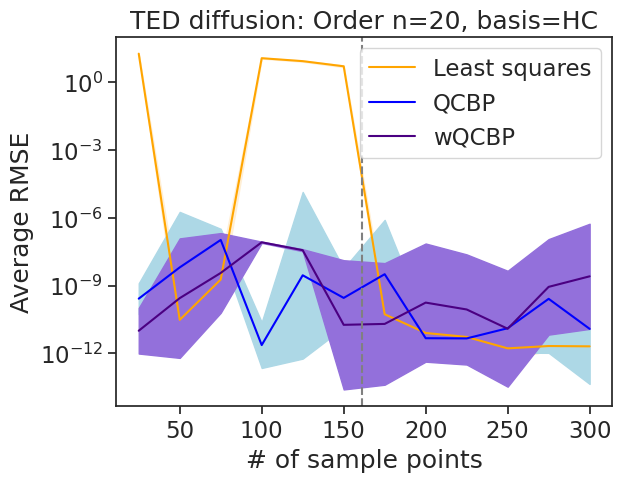

In [ ]:
### Convergence plot of average RMSE vs. nb of samples, w/ TD index set
### **TED diffusion**

d = 3  # dimension

basis = 'hyperbolic-cross'
name_basis = 'HC'
order = 20    # cardinality = 161
cardinality = eq.basis.Basis(basis, orders=[order for _ in range(d)]).get_cardinality()
start, end, step = 25, 325, 25
nb_samples = [i for i in range(start, end, step)]

y_ls = np.loadtxt(folder_experiments + 'TED_d{}n{}{}_{}-{}-{}_LS_k5.txt'.format(d, order, name_basis, start, end, step))
y_cs = np.loadtxt(folder_experiments + 'TED_d{}n{}{}_{}-{}-{}_QCBP_k5.txt'.format(d, order, name_basis, start, end, step))
y_wcs = np.loadtxt(folder_experiments + 'TED_d{}n{}{}_{}-{}-{}_wQCBP_k5.txt'.format(d, order, name_basis, start, end, step))

N_ls = y_ls.shape[1]
N_cs = y_ls.shape[1]
N_wcs = y_ls.shape[1]

mu_ls = get_mu(y_ls, N_ls)
sig_ls = get_sig(y_ls, mu_ls, N_ls)

mu_cs = get_mu(y_cs, N_cs)
sig_cs = get_sig(y_cs, mu_cs, N_cs)

mu_wcs = get_mu(y_wcs, N_wcs)
sig_wcs = get_sig(y_wcs, mu_wcs, N_wcs)


fig, ax = plt.subplots()
ax.plot(nb_samples, 10**mu_ls, 'orange', label='Least squares')
ax.plot(nb_samples, 10**mu_cs, 'blue', label='QCBP')
ax.plot(nb_samples, 10**mu_wcs, 'indigo', label='wQCBP')
ax.fill_between(nb_samples, 10**(mu_ls - sig_ls), 10**(mu_ls + sig_ls), color='papayawhip')
ax.fill_between(nb_samples, 10**(mu_cs - sig_cs), 10**(mu_cs + sig_cs), color='lightblue')
ax.fill_between(nb_samples, 10**(mu_wcs - sig_wcs), 10**(mu_wcs + sig_wcs), color='mediumpurple')
ax.axvline(x=cardinality, color='grey', linestyle='--')
ax.set_yscale('log')
ax.set_xlabel('# of sample points')
ax.set_ylabel('Average RMSE')
ax.set_title('TED diffusion: Order n={}, basis={}'.format(str(order), name_basis))
ax.legend()

### d = 6

In [ ]:
eq.basis.Basis('total-order', orders=[9 for _ in range(6)]).get_cardinality()

5005

In [ ]:
eq.basis.Basis('hyperbolic-cross', orders=[16 for _ in range(6)]).get_cardinality()

537

In [ ]:
### Save data for average RMSE vs. nb of samples, w/ TD index set

d = 6  # dimension
K = 3  # communities

G, n, A, L, sizes, x0 = initialize_graph(K, 5)
basis = 'total-order'
name_basis = 'TD'
order = 9
# cardinality = eq.basis.Basis(basis, orders=[order for _ in range(d)]).get_cardinality()
start, end, step = 2000, 9000, 1000
nb_samples = [i for i in range(start, end, step)]
N_trial = 4

'''
y_ls = conv(nb_samples, ls, dim=d, simuls=N_trial, basis=basis, ord=order)
np.savetxt(folder_experiments + 'ED_d{}n{}{}_{}-{}-{}_LS_k5.txt'.format(d, order, name_basis, start, end, step), y_ls, fmt='%.10e')
y_cs = conv(nb_samples, qcbp, dim=d, simuls=N_trial, basis=basis, ord=order)
np.savetxt(folder_experiments + 'ED_d{}n{}{}_{}-{}-{}_QCBP_k5.txt'.format(d, order, name_basis, start, end, step), y_cs, fmt='%.10e')
'''
y_wcs = conv(nb_samples, weighted_qcbp, dim=d, simuls=N_trial, basis=basis, ord=order)
np.savetxt(folder_experiments + 'ED_d{}n{}{}_{}-{}-{}_wQCBP_k5.txt'.format(d, order, name_basis, start, end, step), y_wcs, fmt='%.10e')
#clear_output()

Coefficients obtained in 30.056915998458862 seconds
RMSE computed in 6.081143379211426 seconds. Round 0 completed.
Coefficients obtained in 30.05871868133545 seconds
RMSE computed in 6.971895217895508 seconds. Round 1 completed.
Coefficients obtained in 29.860679149627686 seconds
RMSE computed in 7.624938488006592 seconds. Round 2 completed.
Coefficients obtained in 30.011600971221924 seconds
RMSE computed in 6.138646125793457 seconds. Round 3 completed.
Coefficients obtained in 46.516032218933105 seconds
RMSE computed in 6.308022975921631 seconds. Round 0 completed.
Coefficients obtained in 46.22423219680786 seconds
RMSE computed in 6.989299058914185 seconds. Round 1 completed.
Coefficients obtained in 47.772156953811646 seconds
RMSE computed in 6.156786680221558 seconds. Round 2 completed.
Coefficients obtained in 47.07719922065735 seconds
RMSE computed in 6.99146032333374 seconds. Round 3 completed.
Coefficients obtained in 66.51735258102417 seconds
RMSE computed in 6.25118708610534

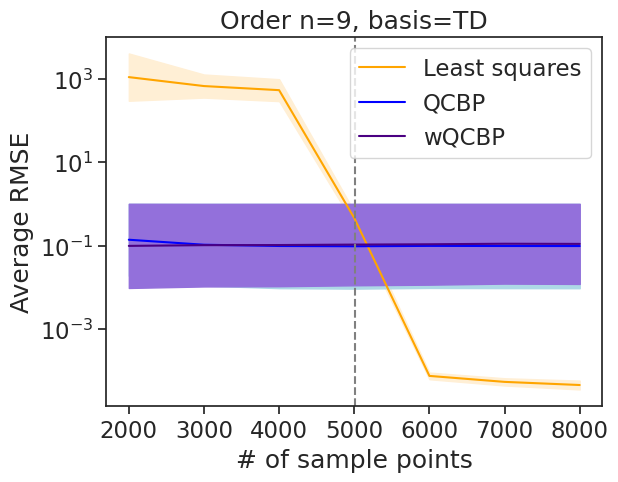

In [ ]:
### Convergence plot of average RMSE vs. nb of samples, w/ TD index set

d = 6  # dimension

basis = 'total-order'
name_basis = 'TD'
order = 9
cardinality = eq.basis.Basis(basis, orders=[order for _ in range(d)]).get_cardinality()
start, end, step = 2000, 9000, 1000
nb_samples = [i for i in range(start, end, step)]

y_ls = np.loadtxt(folder_experiments + 'ED_d{}n{}{}_{}-{}-{}_LS_k5.txt'.format(d, order, name_basis, start, end, step))
y_cs = np.loadtxt(folder_experiments + 'ED_d{}n{}{}_{}-{}-{}_QCBP_k5.txt'.format(d, order, name_basis, start, end, step))
y_wcs = np.loadtxt(folder_experiments + 'ED_d{}n{}{}_{}-{}-{}_wQCBP_k5.txt'.format(d, order, name_basis, start, end, step))

N_ls = y_ls.shape[1]
N_cs = y_ls.shape[1]
N_wcs = y_ls.shape[1]

mu_ls = get_mu(y_ls, N_ls)
sig_ls = get_sig(y_ls, mu_ls, N_ls)

mu_cs = get_mu(y_cs, N_cs)
sig_cs = get_sig(y_cs, mu_cs, N_cs)

mu_wcs = get_mu(y_wcs, N_wcs)
sig_wcs = get_sig(y_wcs, mu_wcs, N_wcs)


fig, ax = plt.subplots()
ax.plot(nb_samples, 10**mu_ls, 'orange', label='Least squares')
ax.plot(nb_samples, 10**mu_cs, 'blue', label='QCBP')
ax.plot(nb_samples, 10**mu_wcs, 'indigo', label='wQCBP')
ax.fill_between(nb_samples, 10**(mu_ls - sig_ls), 10**(mu_ls + sig_ls), color='papayawhip')
ax.fill_between(nb_samples, 10**(mu_cs - sig_cs), 10**(mu_cs + sig_cs), color='lightblue')
ax.fill_between(nb_samples, 10**(mu_wcs - sig_wcs), 10**(mu_wcs + sig_wcs), color='mediumpurple')
ax.axvline(x=cardinality, color='grey', linestyle='--')
ax.set_yscale('log')
ax.set_xlabel('# of sample points')
ax.set_ylabel('Average RMSE')
ax.set_title('Order n={}, basis={}'.format(str(order), name_basis))
ax.legend()

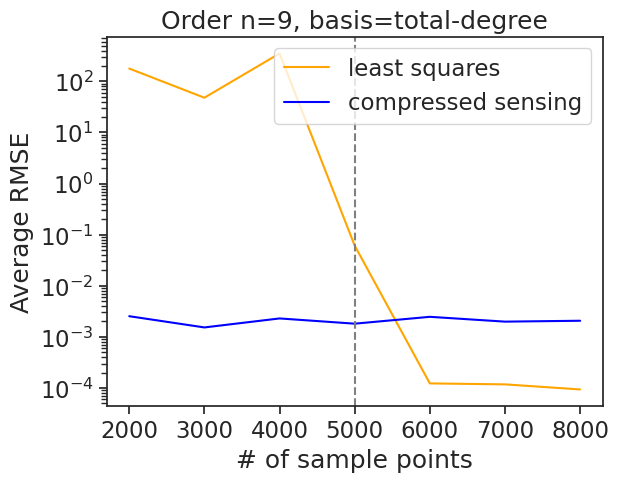

In [ ]:
cutoff = len(nb_samples)

plt.plot(nb_samples[:cutoff], y_ls[:cutoff], 'orange', label='least squares')
plt.plot(nb_samples[:cutoff], y_cs[:cutoff], 'blue', label='compressed sensing')
plt.axvline(x=cardinality, color='grey', linestyle='--')
plt.yscale('log')
plt.xlabel('# of sample points')
plt.ylabel('Average RMSE')
plt.title('Order n={}, basis={}'.format(str(order), name_basis))
plt.legend()
plt.show()

In [ ]:
### Convergence plot of average RMSE vs. nb of samples, w/ HC index set

d = 6  # dimension
K = 3  # communities

G, n, A, L, sizes, x0 = initialize_graph(K, 5)
basis = 'hyperbolic-cross'
name_basis = 'hyperbolic-cross'
order = 12
cardinality = eq.basis.Basis(basis, orders=[order for _ in range(d)]).get_cardinality()  # 333
nb_samples = [10*i for i in range(5, 71)]

y_ls = conv(nb_samples, ls, dim=d, simuls=1, basis=basis, ord=order)
y_cs = conv(nb_samples, qcbp, dim=d, simuls=1, basis=basis, ord=order)

KeyboardInterrupt: 

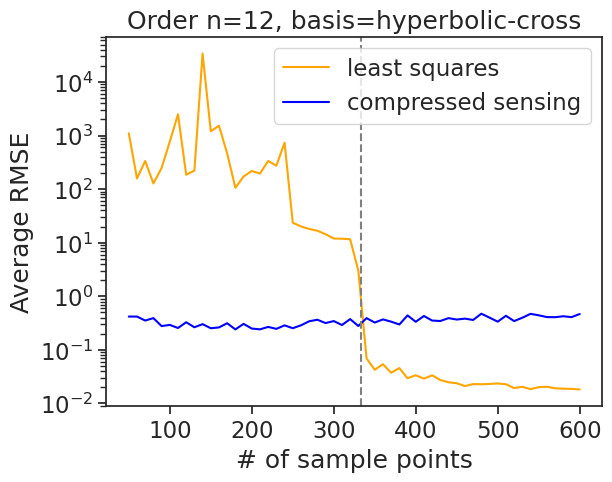

In [ ]:
cutoff = 56

plt.plot(nb_samples[:cutoff], y_ls[:cutoff], 'orange', label='least squares')
plt.plot(nb_samples[:cutoff], y_cs[:cutoff], 'blue', label='compressed sensing')
plt.axvline(x=cardinality, color='grey', linestyle='--')
plt.yscale('log')
plt.xlabel('# of sample points')
plt.ylabel('Average RMSE')
plt.title('Order n={}, basis={}'.format(str(order), name_basis))
plt.legend()
plt.show()

In [ ]:
### Convergence plot of average RMSE vs. nb of samples, w/ HC index set

d = 6  # dimension
K = 3  # communities

G, n, A, L, sizes, x0 = initialize_graph(K, 5)
basis = 'hyperbolic-cross'
name_basis = 'hyperbolic-cross'
order = 16
cardinality = eq.basis.Basis(basis, orders=[order for _ in range(d)]).get_cardinality()  # 537
nb_samples = [10*i for i in range(5, 91)]

y_ls = conv(nb_samples, ls, dim=d, simuls=1, basis=basis, ord=order)
y_cs = conv(nb_samples, qcbp, dim=d, simuls=1, basis=basis, ord=order)

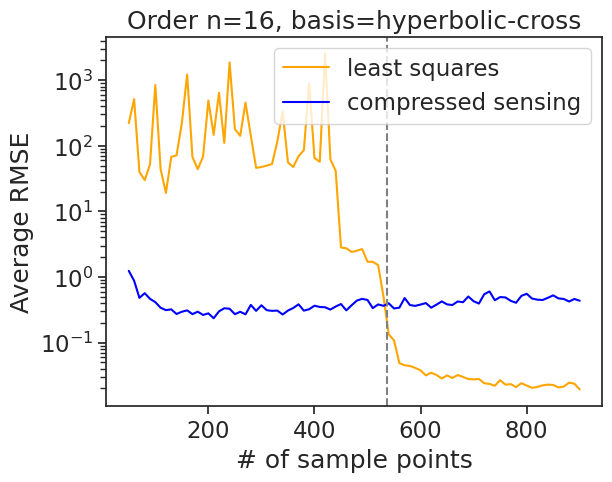

In [ ]:
cutoff = 86

plt.plot(nb_samples[:cutoff], y_ls[:cutoff], 'orange', label='least squares')
plt.plot(nb_samples[:cutoff], y_cs[:cutoff], 'blue', label='compressed sensing')
plt.axvline(x=cardinality, color='grey', linestyle='--')
plt.yscale('log')
plt.xlabel('# of sample points')
plt.ylabel('Average RMSE')
plt.title('Order n={}, basis={}'.format(str(order), name_basis))
plt.legend()
plt.show()

### d = 10

In [ ]:
eq.basis.Basis('total-order', orders=[5 for _ in range(10)]).get_cardinality()

3003

In [ ]:
eq.basis.Basis('hyperbolic-cross', orders=[25 for _ in range(10)]).get_cardinality()

5741

In [ ]:
### Save data for average RMSE vs. nb of samples, w/ TD index set

d = 10  # dimension
K = 4  # communities

G, n, A, L, sizes, x0 = initialize_graph(K, 5)
basis = 'total-order'
name_basis = 'TD'
order = 9
# cardinality = eq.basis.Basis(basis, orders=[order for _ in range(d)]).get_cardinality()
start, end, step = 2000, 9000, 1000
nb_samples = [i for i in range(start, end, step)]
N_trial = 1

get_average_rmse(2000, ls, dim=d, simuls=N_trial, basis=basis, ord=order)

In [ ]:
### Save data for average RMSE vs. nb of samples, w/ TD index set

d = 10  # dimension
K = 4  # communities

G, n, A, L, sizes, x0 = initialize_graph(K, 5)
basis = 'hyperbolic-cross'
name_basis = 'HC'
order = 25
# cardinality = eq.basis.Basis(basis, orders=[order for _ in range(d)]).get_cardinality()
start, end, step = 2000, 9000, 1000
nb_samples = [i for i in range(start, end, step)]
N_trial = 1

get_average_rmse(2000, qcbp, dim=d, simuls=N_trial, basis=basis, ord=order)

Training data generated in 17.341364860534668 seconds.
Coefficients obtained in 33.77263402938843 seconds
RMSE computed in 9.556520938873291 seconds. Round 0 completed.


array([0.2078255])

## Average RMSE vs. cardinality of basis

In [ ]:
print([eq.basis.Basis('hyperbolic-cross', orders=[i for _ in range(3)]).get_cardinality() for i in range(4,52,4)])

[16, 44, 77, 113, 161, 209, 249, 309, 366, 417, 483, 546]


In [ ]:
print([eq.basis.Basis('total-order', orders=[i for _ in range(3)]).get_cardinality() for i in range(3,15)])

[20, 35, 56, 84, 120, 165, 220, 286, 364, 455, 560, 680]


In [ ]:
### Exp 1

d = 3  # dimension
K = 2  # communities

G, n, A, L, sizes, x0 = initialize_graph(K, 5)
m = 350
y_1 = []
y_2 = []
y_3 = []
y_4 = []
TD_orders = [i for i in range(3,15)]
HC_orders = [i for i in range(4,52,4)]

for o1 in TD_orders:
  y_1.append(get_average_rmse(m, ls, dim=d, simuls=1, basis='total-order', ord=o1))
  y_2.append(get_average_rmse(m, qcbp, dim=d, simuls=1, basis='total-order', ord=o1))

for o2 in HC_orders:
  y_3.append(get_average_rmse(m, ls, dim=d, simuls=1, basis='hyperbolic-cross', ord=o2))
  y_4.append(get_average_rmse(m, qcbp, dim=d, simuls=1, basis='hyperbolic-cross', ord=o2))

Y_TD = [y_1, y_2]
card_TD = [eq.basis.Basis('total-order', orders=[i for _ in range(d)]).get_cardinality() for i in TD_orders]

Y_HC = [y_3, y_4]
card_HC = [eq.basis.Basis('hyperbolic-cross', orders=[i for _ in range(d)]).get_cardinality() for i in HC_orders]

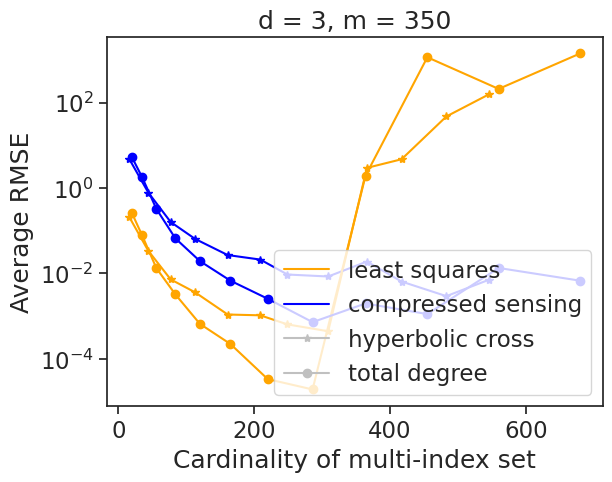

In [ ]:
plt.plot(card_HC, Y_HC[0], color='orange', marker='*')
plt.plot(card_HC, Y_HC[1], color='blue', marker='*')
plt.plot(card_TD, Y_TD[0], color='orange', marker='o')
plt.plot(card_TD, Y_TD[1], color='blue', marker='o')

plt.title('d = {}, m = {}'.format(str(d), str(m)))
plt.xlabel('Cardinality of multi-index set')
plt.ylabel('Average RMSE')
plt.yscale('log')
legend_handles = [mlines.Line2D([], [], color='orange', linestyle='-', label='least squares'),
                  mlines.Line2D([], [], color='blue', linestyle='-', label='compressed sensing'),
                  mlines.Line2D([], [], color='silver', linestyle='-', marker='*', label='hyperbolic cross'),
                  mlines.Line2D([], [], color='silver', linestyle='-', marker='o', label='total degree')]
plt.legend(handles=legend_handles, loc='lower right')
plt.show()

In [ ]:
### Exp 2

d = 3  # dimension
K = 2  # communities

G, n, A, L, sizes, x0 = initialize_graph(K, 5)
m = 1000
y_1 = []
y_2 = []
y_3 = []
y_4 = []
TD_orders = [i for i in range(3,15)]
HC_orders = [i for i in range(4,52,4)]

for o1 in TD_orders:
  y_1.append(get_average_rmse(m, ls, dim=d, simuls=1, basis='total-order', ord=o1))
  y_2.append(get_average_rmse(m, qcbp, dim=d, simuls=1, basis='total-order', ord=o1))

for o2 in HC_orders:
  y_3.append(get_average_rmse(m, ls, dim=d, simuls=1, basis='hyperbolic-cross', ord=o2))
  y_4.append(get_average_rmse(m, qcbp, dim=d, simuls=1, basis='hyperbolic-cross', ord=o2))

clear_output()

Y_TD = [y_1, y_2]
card_TD = [eq.basis.Basis('total-order', orders=[i for _ in range(d)]).get_cardinality() for i in TD_orders]

Y_HC = [y_3, y_4]
card_HC = [eq.basis.Basis('hyperbolic-cross', orders=[i for _ in range(d)]).get_cardinality() for i in HC_orders]

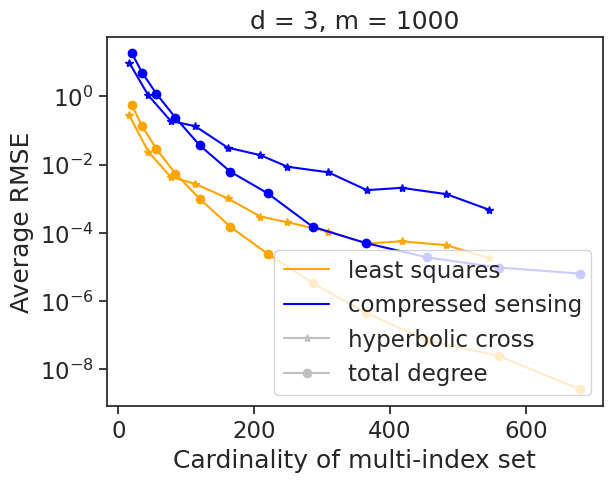

In [ ]:
plt.plot(card_HC, Y_HC[0], color='orange', marker='*')
plt.plot(card_HC, Y_HC[1], color='blue', marker='*')
plt.plot(card_TD, Y_TD[0], color='orange', marker='o')
plt.plot(card_TD, Y_TD[1], color='blue', marker='o')

plt.title('d = {}, m = {}'.format(str(d), str(m)))
plt.xlabel('Cardinality of multi-index set')
plt.ylabel('Average RMSE')
plt.yscale('log')
legend_handles = [mlines.Line2D([], [], color='orange', linestyle='-', label='least squares'),
                  mlines.Line2D([], [], color='blue', linestyle='-', label='compressed sensing'),
                  mlines.Line2D([], [], color='silver', linestyle='-', marker='*', label='hyperbolic cross'),
                  mlines.Line2D([], [], color='silver', linestyle='-', marker='o', label='total degree')]
plt.legend(handles=legend_handles, loc='lower right')
plt.show()

# Old section 1

In [ ]:
d = 3

In [ ]:
nb_samples = [i*50 for i in range(1,41)]

In [ ]:
get_average_rmse_varcoefs(500, 'least-squares', simuls=1, basis='total-order', ord=7)

0.2296661923027443

In [ ]:
methods = ['least-squares', 'compressed-sensing']
orders = [18]
bases = ['hyperbolic-basis']

In [ ]:
for bas in bases:
  for o in orders:
    for met in methods:
      y = conv_varcoefs(nb_samples, met, dim=d, simuls=5, basis=bas, ord=o)
      np.savetxt('Gt2d{}-{}-{}-n{}.txt'.format(d, met, bas, o), np.array([nb_samples, y]), fmt='%1.10e')

In [ ]:
eq.basis.Basis('hyperbolic-basis', orders=[18 for i in range(3)], q=0.5).get_cardinality()

197

# Old section 2

In [ ]:
d

6

In [ ]:
eq.basis.Basis('hyperbolic-cross', orders=[i for _ in range(4)]).get_cardinality()

In [ ]:
#print([eq.basis.Basis('hyperbolic-cross', orders=[i for _ in range(d)]).get_cardinality() for i in range(4,52,4)])
print([eq.basis.Basis('hyperbolic-cross', orders=[i for _ in range(d)]).get_cardinality() for i in range(3,59,7)])

[34, 201, 663, 1230, 1928, 2555, 3407, 4484]


In [ ]:
#print([eq.basis.Basis('total-order', orders=[i for _ in range(d)]).get_cardinality() for i in range(3,15)])
print([eq.basis.Basis('total-order', orders=[i for _ in range(d)]).get_cardinality() for i in range(2,10)])

[28, 84, 210, 462, 924, 1716, 3003, 5005]


In [ ]:
m = 1000

y_1 = []
y_2 = []
for order in range(3,59,7):
  y_1.append(get_average_rmse(m, 'least-squares', dim=d, simuls=1, basis='hyperbolic-cross', ord=order))
  y_2.append(get_average_rmse(m, 'compressed-sensing', dim=d, simuls=1, basis='hyperbolic-cross', ord=order))

Y_HC = [y_1, y_2]
card_HC = [eq.basis.Basis('hyperbolic-cross', orders=[i for _ in range(d)]).get_cardinality() for i in range(3,59,7)]

y_3 = []
y_4 = []
for order in range(2,10):
  y_3.append(get_average_rmse(m, 'least-squares', dim=d, simuls=1, basis='total-order', ord=order))
  y_4.append(get_average_rmse(m, 'compressed-sensing', dim=d, simuls=1, basis='total-order', ord=order))

Y_TD = [y_3, y_4]
card_TD = [eq.basis.Basis('total-order', orders=[i for _ in range(d)]).get_cardinality() for i in range(2,10)]

KeyboardInterrupt: 

In [ ]:
card_HC = [eq.basis.Basis('hyperbolic-cross', orders=[i for _ in range(d)]).get_cardinality() for i in range(3,59,7)]
card_TD = [eq.basis.Basis('total-order', orders=[i for _ in range(d)]).get_cardinality() for i in range(2,10)]

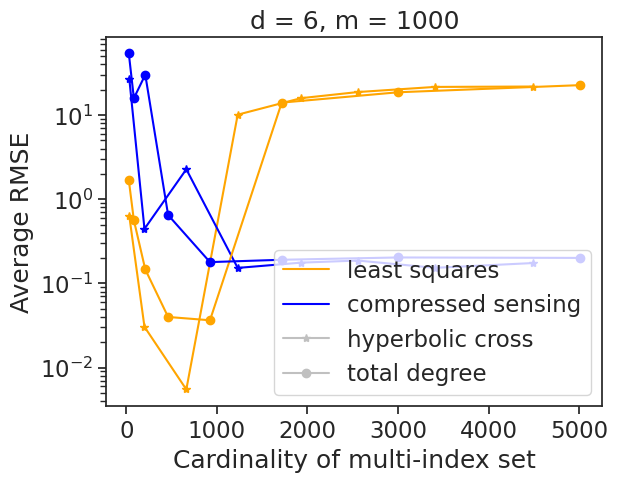

In [ ]:
plt.plot(card_HC, Y_HC[0], color='orange', marker='*')
plt.plot(card_HC, Y_HC[1], color='blue', marker='*')
plt.plot(card_TD, Y_TD[0], color='orange', marker='o')
plt.plot(card_TD, Y_TD[1], color='blue', marker='o')

plt.title('d = {}, m = {}'.format(str(d), str(m)))
plt.xlabel('Cardinality of multi-index set')
plt.ylabel('Average RMSE')
plt.yscale('log')
legend_handles = [mlines.Line2D([], [], color='orange', linestyle='-', label='least squares'),
                  mlines.Line2D([], [], color='blue', linestyle='-', label='compressed sensing'),
                  mlines.Line2D([], [], color='silver', linestyle='-', marker='*', label='hyperbolic cross'),
                  mlines.Line2D([], [], color='silver', linestyle='-', marker='o', label='total degree')]
plt.legend(handles=legend_handles, loc='lower right')
plt.show()